Dataset Shape: (952, 24)

Data Types and Missing Values:

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    object 
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                  

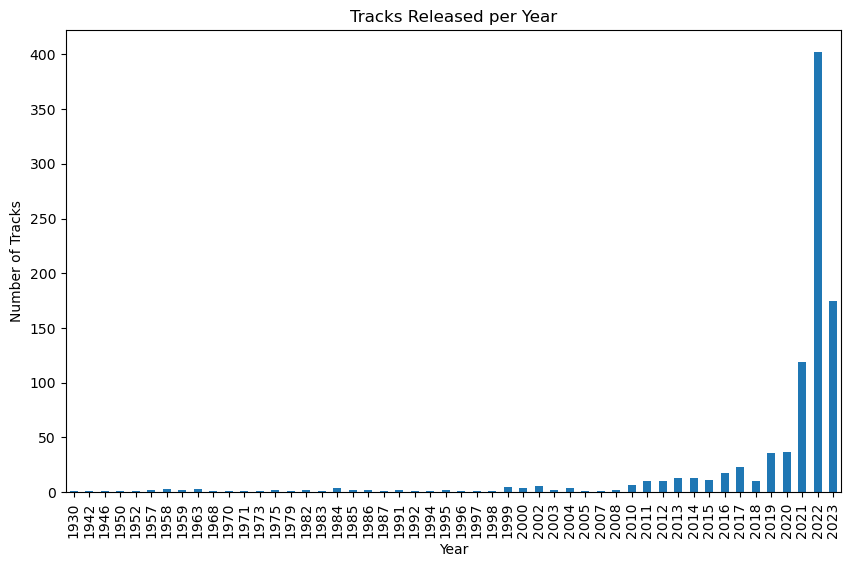

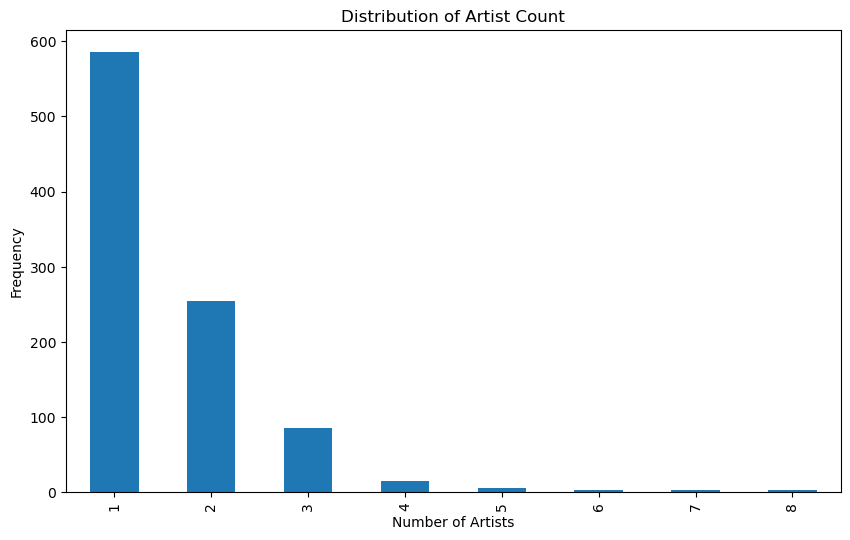

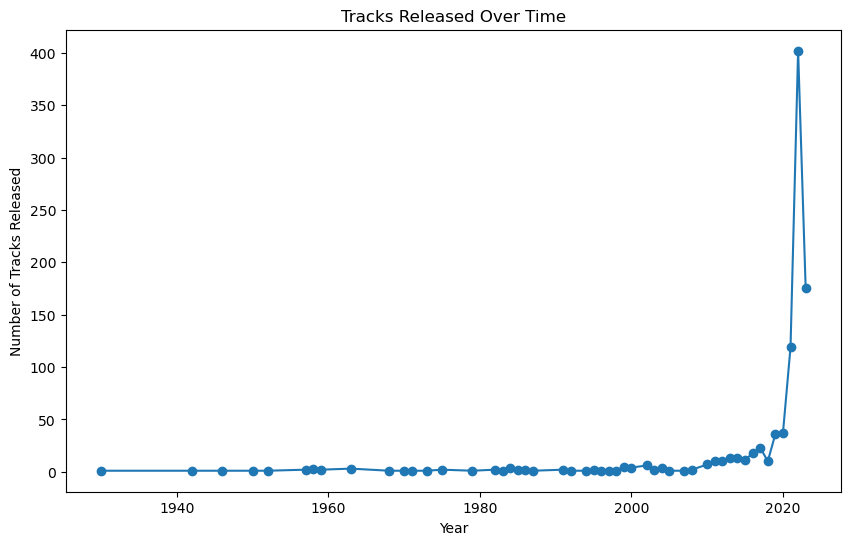

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8324\2949908744.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_month'] = pd.to_datetime(df['released_month'].astype(str) + ' ' + df['released_year'].astype(str)).dt.month


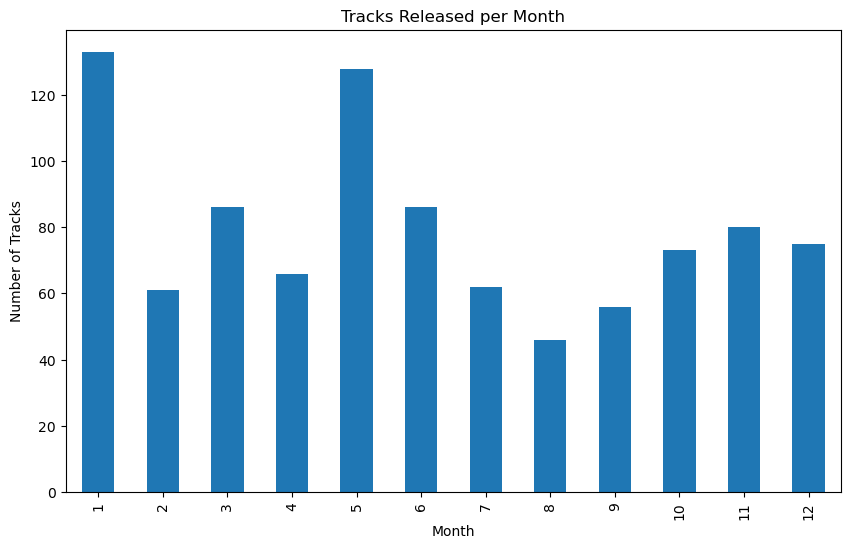

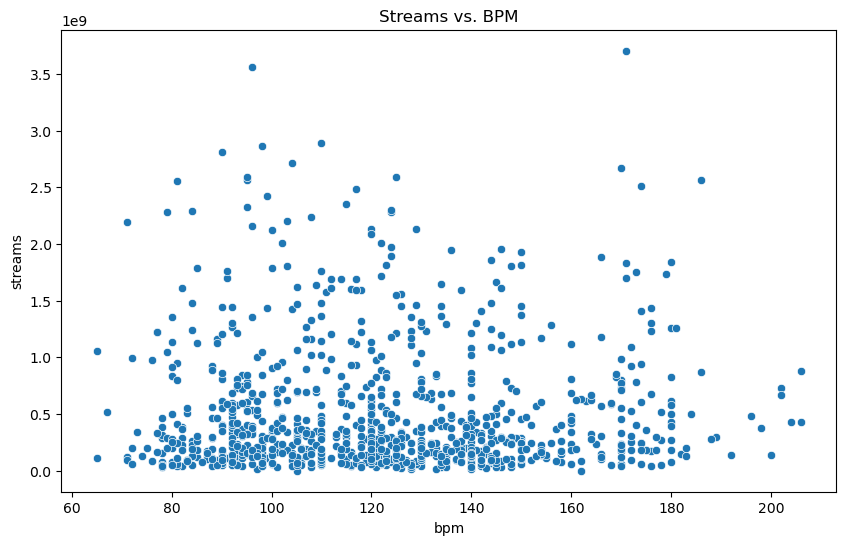

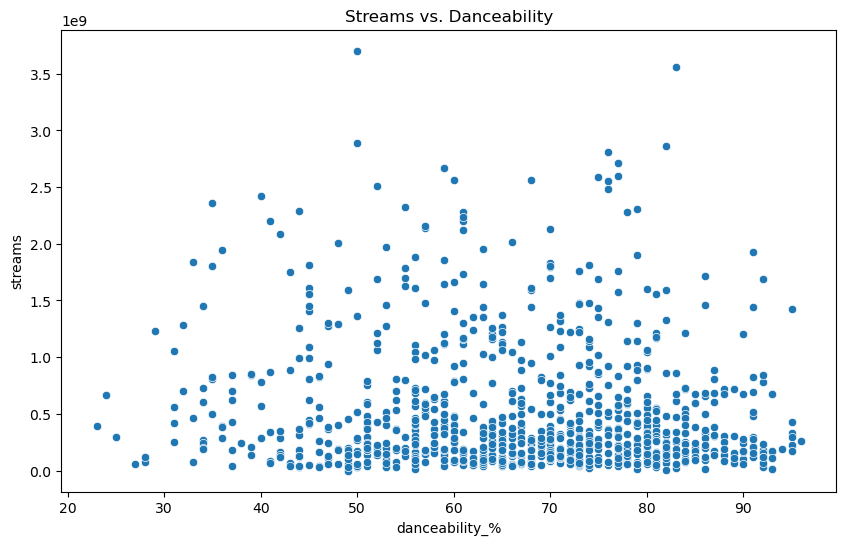

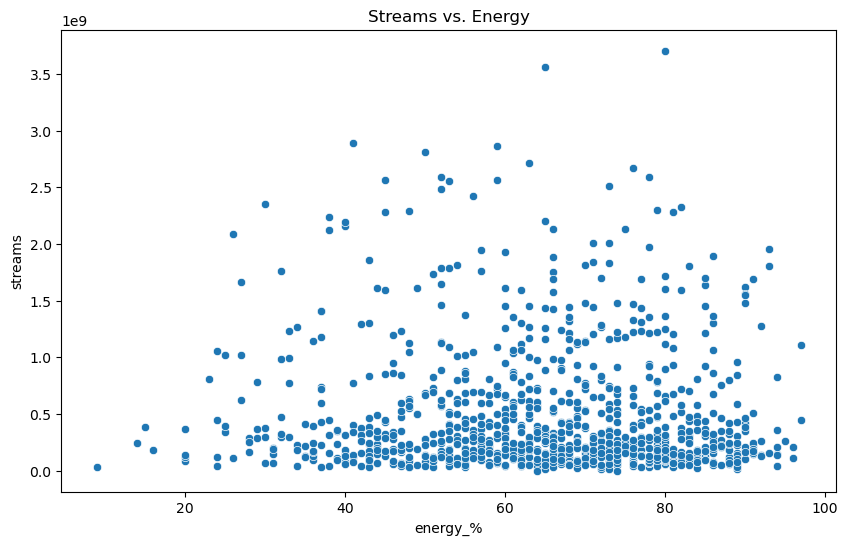

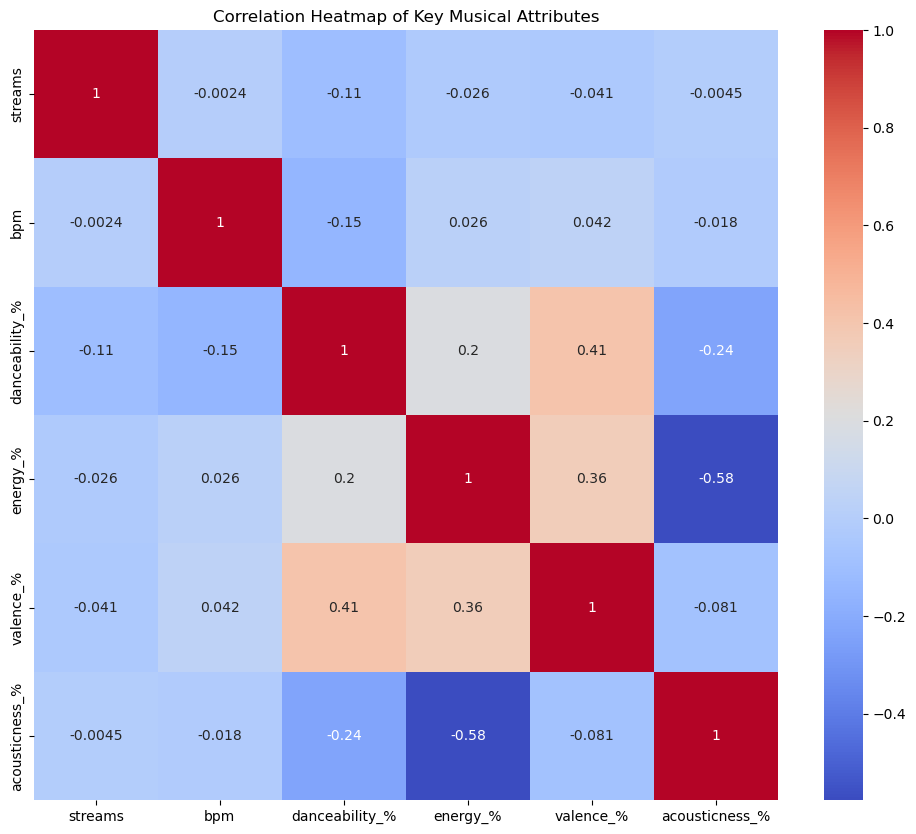

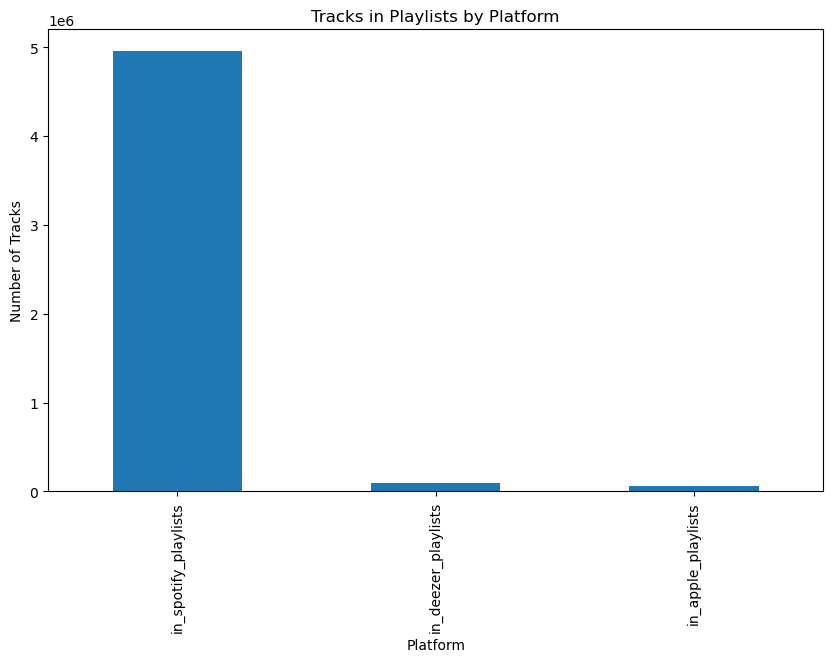


Average Streams by Key and Mode:
 mode         Major         Minor
key                             
A     4.019603e+08  4.173906e+08
A#    6.275336e+08  4.849231e+08
B     4.363336e+08  5.825110e+08
C#    6.285883e+08  5.665252e+08
D     5.720180e+08  3.425588e+08
D#    6.819623e+08  4.793647e+08
E     7.605963e+08  5.083264e+08
F     5.279311e+08  4.102836e+08
F#    4.175450e+08  5.954921e+08
G     4.929813e+08  3.637593e+08
G#    5.458044e+08  3.219036e+08


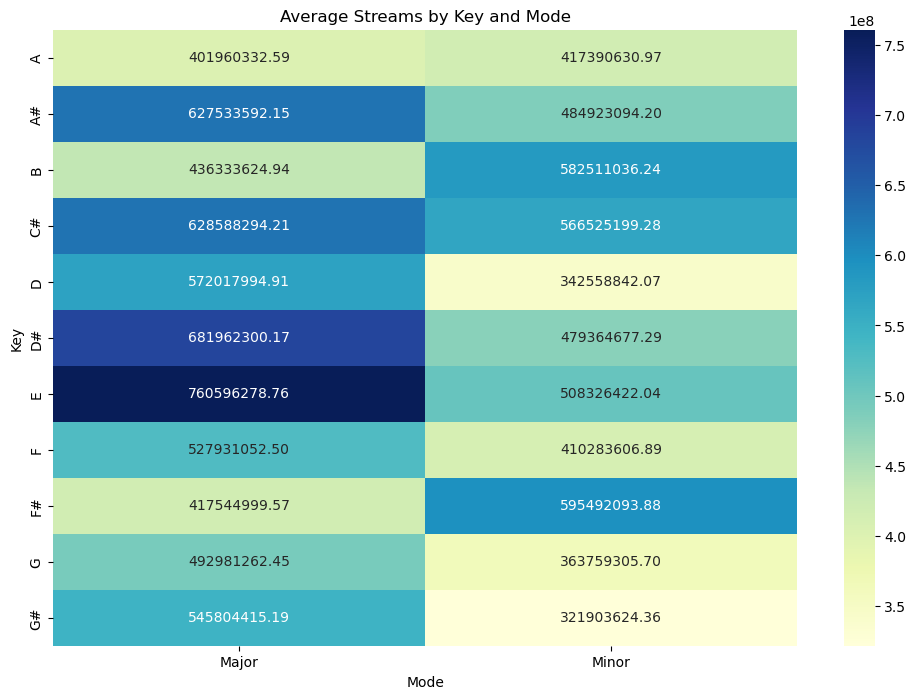


Top Artists Frequently in Spotify Playlists:
 artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: int64


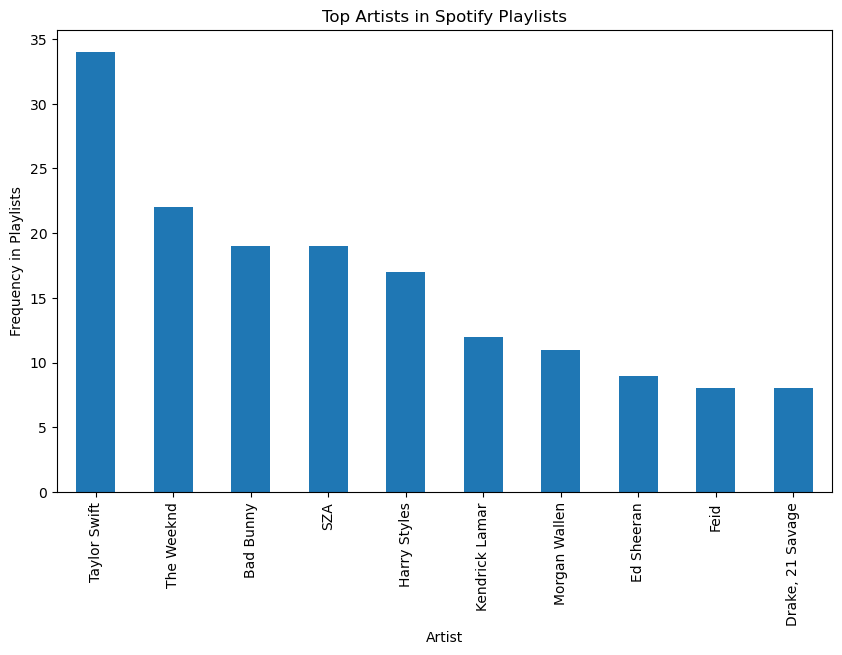

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Prepare Dataset
f = 'spotify-2023.csv'
df = pd.read_csv(f, encoding='latin1')

# Convert 'streams' column to numeric, handling errors by setting non-numeric entries to NaN, then drop rows with NaN in 'streams'
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.dropna(subset=['streams'], inplace=True)

# Display Dataset Overview
print("Dataset Shape:", df.shape)
print("\nData Types and Missing Values:\n")
print(df.info())
print("\nMissing Values per Column:\n", df.isnull().sum())

# Descriptive Statistics for 'streams'
print("\n'Streams' Descriptive Statistics:")
print("Mean:", df['streams'].mean())
print("Median:", df['streams'].median())
print("Standard Deviation:", df['streams'].std())

# Display Column Names
print("\nColumn Names in DataFrame:\n", df.columns.tolist())

# Most Frequent Artists
a_col = 'artist(s)_name'
if a_col in df.columns:
    top_a = df[a_col].value_counts().head(5)
    print("\nTop 5 Most Frequent Artists:\n", top_a)
else:
    print(f"\nColumn '{a_col}' not found in DataFrame.")

# Top 5 Most Streamed Tracks
top_t = df.nlargest(5, 'streams')[['track_name', 'streams']]
print("\nTop 5 Most Streamed Tracks:\n", top_t)

# Visualization Functions for Reusability
def plot_bar(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_scatter(data, x, y, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(title)
    plt.show()

# Release Year and Artist Count Distributions
plot_bar(df['released_year'].value_counts().sort_index(), "Tracks Released per Year", "Year", "Number of Tracks")
# Insight: The bar chart of tracks released by year shows a growing trend, especially in the recent years, suggesting the rise in music production over time.

plot_bar(df['artist_count'].value_counts().sort_index(), "Distribution of Artist Count", "Number of Artists", "Frequency")
# Insight: This visualization shows how many artists have released a certain number of tracks, highlighting the concentration of track releases by fewer artists.

# Temporal Trends
plt.figure(figsize=(10, 6))
df.groupby('released_year').size().plot(kind='line', marker='o', title="Tracks Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Tracks Released")
plt.show()
# Insight: The line chart of tracks released over time shows an upward trend, reflecting the increasing number of tracks released each year.

# Monthly Release Trend
df['release_month'] = pd.to_datetime(df['released_month'].astype(str) + ' ' + df['released_year'].astype(str)).dt.month
plot_bar(df.groupby('release_month').size(), "Tracks Released per Month", "Month", "Number of Tracks")
# Insight: The monthly release trend shows that certain months see more tracks being released than others, potentially influenced by industry cycles.

# Music Characteristics and Correlations with Streams
plot_scatter(df, 'bpm', 'streams', "Streams vs. BPM")
# Insight: The scatter plot reveals a weak correlation between bpm and streams, indicating that tracks with higher bpm do not necessarily result in more streams.

plot_scatter(df, 'danceability_%', 'streams', "Streams vs. Danceability")
# Insight: The scatter plot shows a positive correlation between danceability and streams, suggesting that tracks with higher danceability tend to get more streams.

plot_scatter(df, 'energy_%', 'streams', "Streams vs. Energy")
# Insight: The scatter plot indicates that energy is positively correlated with streams, where tracks with higher energy tend to have higher streams.

# Correlation Heatmap of Musical Attributes
plt.figure(figsize=(12, 10))
corr_matrix = df[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Musical Attributes")
plt.show()
# Insight: The heatmap indicates a strong correlation between energy and danceability, while acousticness and energy show a negative correlation, suggesting that energetic tracks tend to have lower acousticness.

# Platform Popularity Analysis
# Convert playlist columns to numeric and fill NaN with 0
p_cols = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']
df[p_cols] = df[p_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
plot_bar(df[p_cols].sum(), "Tracks in Playlists by Platform", "Platform", "Number of Tracks")
# Insight: The analysis shows that Spotify dominates in terms of playlist presence, which could reflect the platform's larger user base and stronger promotion of tracks.

# Patterns by Key and Mode
km_pattern = df.groupby(['key', 'mode'])['streams'].mean().unstack()
print("\nAverage Streams by Key and Mode:\n", km_pattern)

plt.figure(figsize=(12, 8))
sns.heatmap(km_pattern, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Streams by Key and Mode")
plt.xlabel("Mode")
plt.ylabel("Key")
plt.show()
# Insight: The heatmap shows that certain keys and modes have higher average streams, with major keys tending to perform better in terms of stream count.

# Frequent Artists in Spotify Playlists
top_playlist_a = df[a_col][df['in_spotify_playlists'] > 1].value_counts().head(10)
print("\nTop Artists Frequently in Spotify Playlists:\n", top_playlist_a)
plot_bar(top_playlist_a, "Top Artists in Spotify Playlists", "Artist", "Frequency in Playlists")
# Insight: The top artists in Spotify playlists show the most frequent names in playlists, indicating their strong presence and popularity on the platform.
